# DSCI 100 Project Planning Stage

## 1) Data Description
Data was collected while players were actively inside the MineCraft server. Player characteristics, such as age, name, gender, and experience level, were self-declared by the players.

#### players.csv dataset
- Observations: 196
- Variables: 7

<center>Table 1. Variable information from the players.csv dataset</center>

| Variable Name | Type | Meaning |
| ------------- | ---- | ------- |
| experience | character | self-declared skill level of the player |
| subscribe | logical | if the player is subscribed to gaming newsletters |
| hashedEmail | character | a secure format of the player's email address |
| played_hours | number | overall hours spent online by each player |
| name | character | the name of the player |
| gender | character | the gender of the player |
| Age | number | the age of the player |


#### sessions.csv dataset
- Observations: 1535
- Variables: 5

<center>Table 2. Variable information from the sessions.csv dataset</center>

| Variable Name | Type | Meaning |
| ------------- | ---- | ------- |
| hashedEmail | character | a secure format of the player's email address |
| start_time | character | time the player began their session (date and time) |
| end_time | character | time the player ended their session (date and time) |
| original_start_time | number | time the player began their session (milliseconds) |
| original_end_time | number | time the player ended their session (milliseconds) |

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/nkatanchik/dsci_project_planning/refs/heads/main/players.csv")

sessions_data <- read_csv("https://raw.githubusercontent.com/nkatanchik/dsci_project_planning/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Summary Statistics

#### players.csv dataset

In [3]:
# summary statistics for the players.csv dataset
summary(players_data)

experience_levels <- unique(players_data$experience)
experience_levels

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

- of the 196 players, **144** are *subscribed*, and **52** are *not subscribed*.
- there are five unique categories within the "experience" variable: Pro, Veteran, Amateur, Regular, & Beginner.

<center>Table 3. Summary statistics for quantitative variables in players.csv</center>

| Measurement | Mean | Min | Max |
| ----------- | ---- | --- | --- |
| played_hours | 5.85 | 0.00 | 223.10 |
| Age | 21.14 | 9.00 | 58.00 |

#### sessions.csv dataset

In [4]:
# summary statistics for the sessions.csv dataset
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

<center>Table 4. Summary statistics for quantitative variables in sessions.csv</center>

| Measurement | Mean | Min | Max |
| ----------- | ---- | --- | --- |
| original_start_time | 1.72e+12 | 1.71e+12 | 1.73e+12 |
| original_end_time | 1.72e+12| 1.71e+12 | 1.73e+12 |

### Issues in the Datasets
The data is mostly tidy, however, there are some issues. In sessions.csv, the start_time and end_time columns represent the same values as original_start_time and original_end_time, which means data is repeated. Additionally, having Age as a "double" type variable instead of "integer" in players.csv may potentially cause issues, because age is not usually taken as a fractional value. Lastly, there may be missing values, which may affect data visualizations.

## 2) Questions

**Broad**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific**: Can experience level and playtime predict subscription status in the players.csv dataset?

> To answer this question, only the players.csv dataset is needed, as we are only looking at general player characteristics, not data on specific sessions.

### Wrangling Plans
Since the players.csv dataset is already tidy (each column contains one variable, each row corresponds to a single observation, and there is a single measurement in each cell), there is not much wrangling to be done. There are, however, columns that are not needed to answer our question, so to begin, only columns of interest will be selected for. Additionally, quantitative variables with large ranges may need to be divided into groups to make visualization easier to interpret.

## 3) Exploratory Data Analysis and Visualization

In [5]:
players_means <- players_data |>
        mutate(mean_age = mean(Age, na.rm = TRUE)) |>
        mutate(mean_played_hours = mean(played_hours))|>
        select(mean_age, mean_played_hours) |>
        slice(1)

players_means_rounded <- players_means |>
        mutate(mean_age = round(mean_age, 2)) |>
        mutate(mean_played_hours = round(mean_played_hours, 2))
players_means_rounded

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


<center>Table 5. Mean values of categorical variables in players.csv</center>

| Measurement | Mean |
| ----------- | ---- |
| played_hours | 5.85 |
| Age | 21.14 |

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


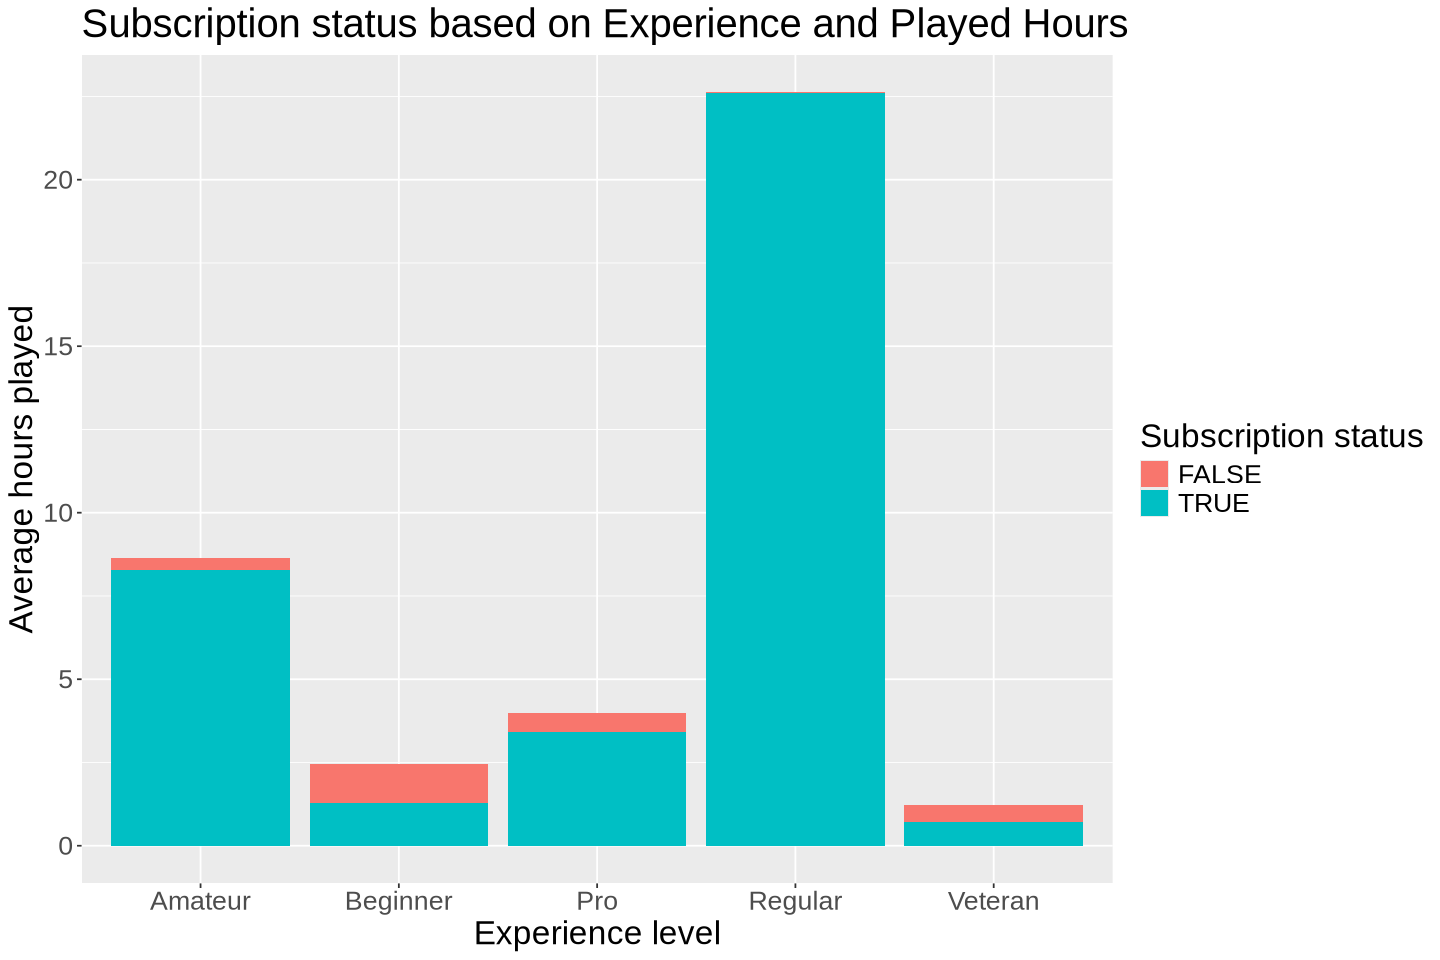

In [6]:
players_selected <- players_data |>
        select(experience, subscribe, played_hours) |>
        group_by(experience, subscribe) |>
        summarize(mean_played_hours = mean(played_hours))

options(repr.plot.width = 12, repr.plot.height = 8)
players_plot <- players_selected |>
        ggplot(aes(x = experience, y = mean_played_hours, fill = subscribe)) +
        geom_bar(stat = "identity") +
        labs(x = "Experience level", y = "Average hours played", fill = "Subscription status") +
        ggtitle("Subscription status based on Experience and Played Hours") +
        theme(text = element_text(size = 20))
players_plot

This graph shows us the relationship between experience level and played hours. On average, the "Amateur" and "Regular" categories spent the most time on the server. There is no apparent correlation between played hours and experience level.

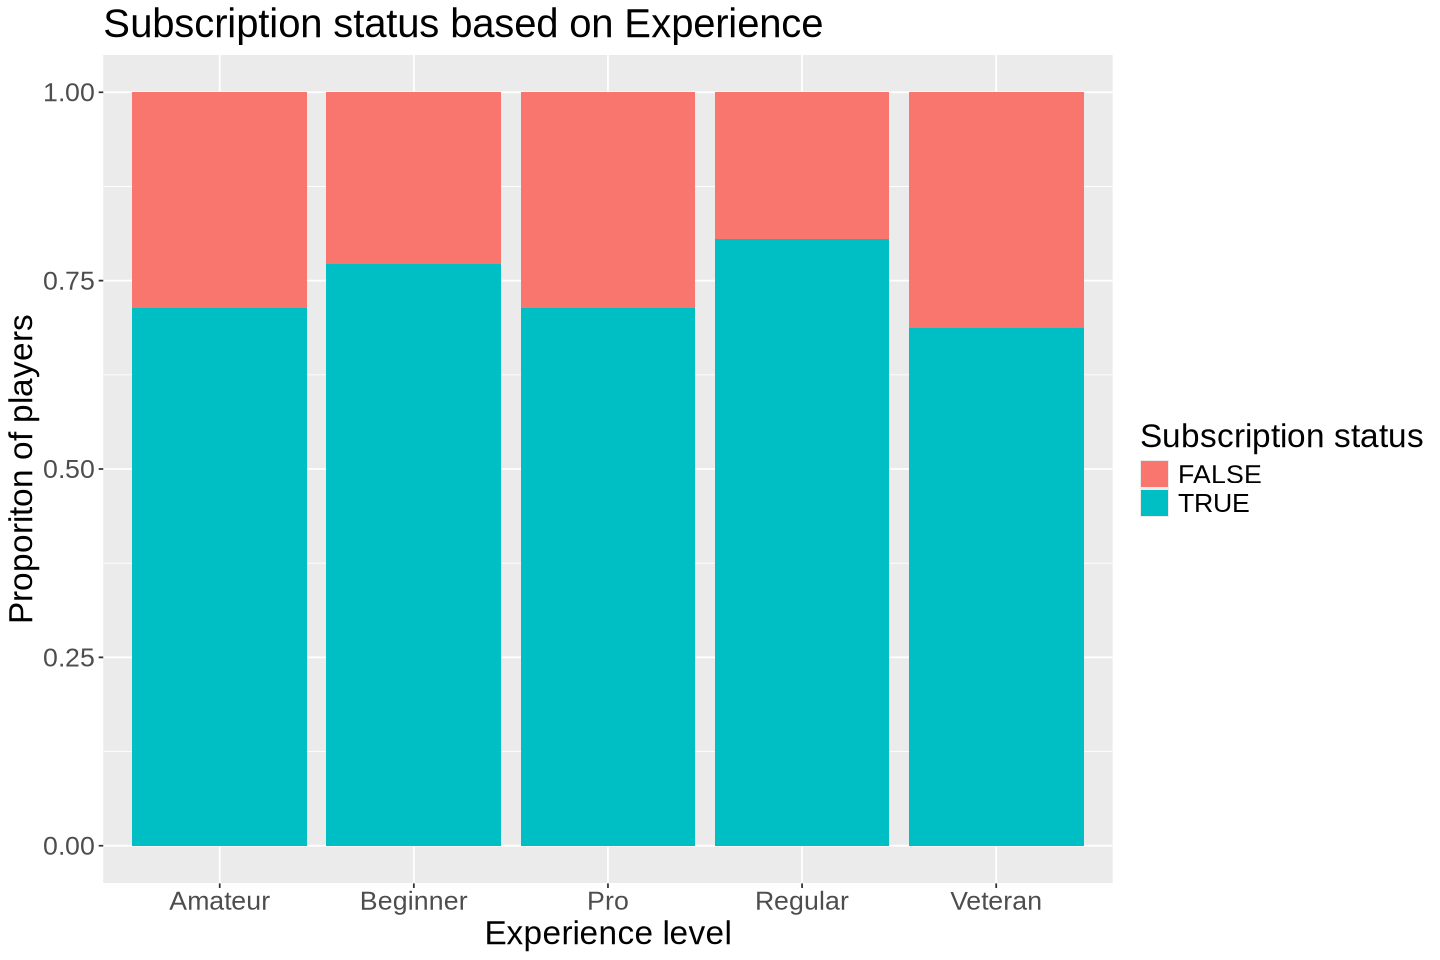

In [7]:
players_plot_exp <- players_data |>
        ggplot(aes(x = experience, fill = subscribe)) +
        geom_bar(position = "fill") +
        labs(x = "Experience level", y = "Proporiton of players", fill = "Subscription status") +
        ggtitle("Subscription status based on Experience") +
        theme(text = element_text(size = 20))
players_plot_exp

There appears to be no relationship between experience and subscription status, as the proportion of subscribed players across all experience levels is similar. "Regular" and "Beginner" players present the highest proportion of subscriptions, though not by much.

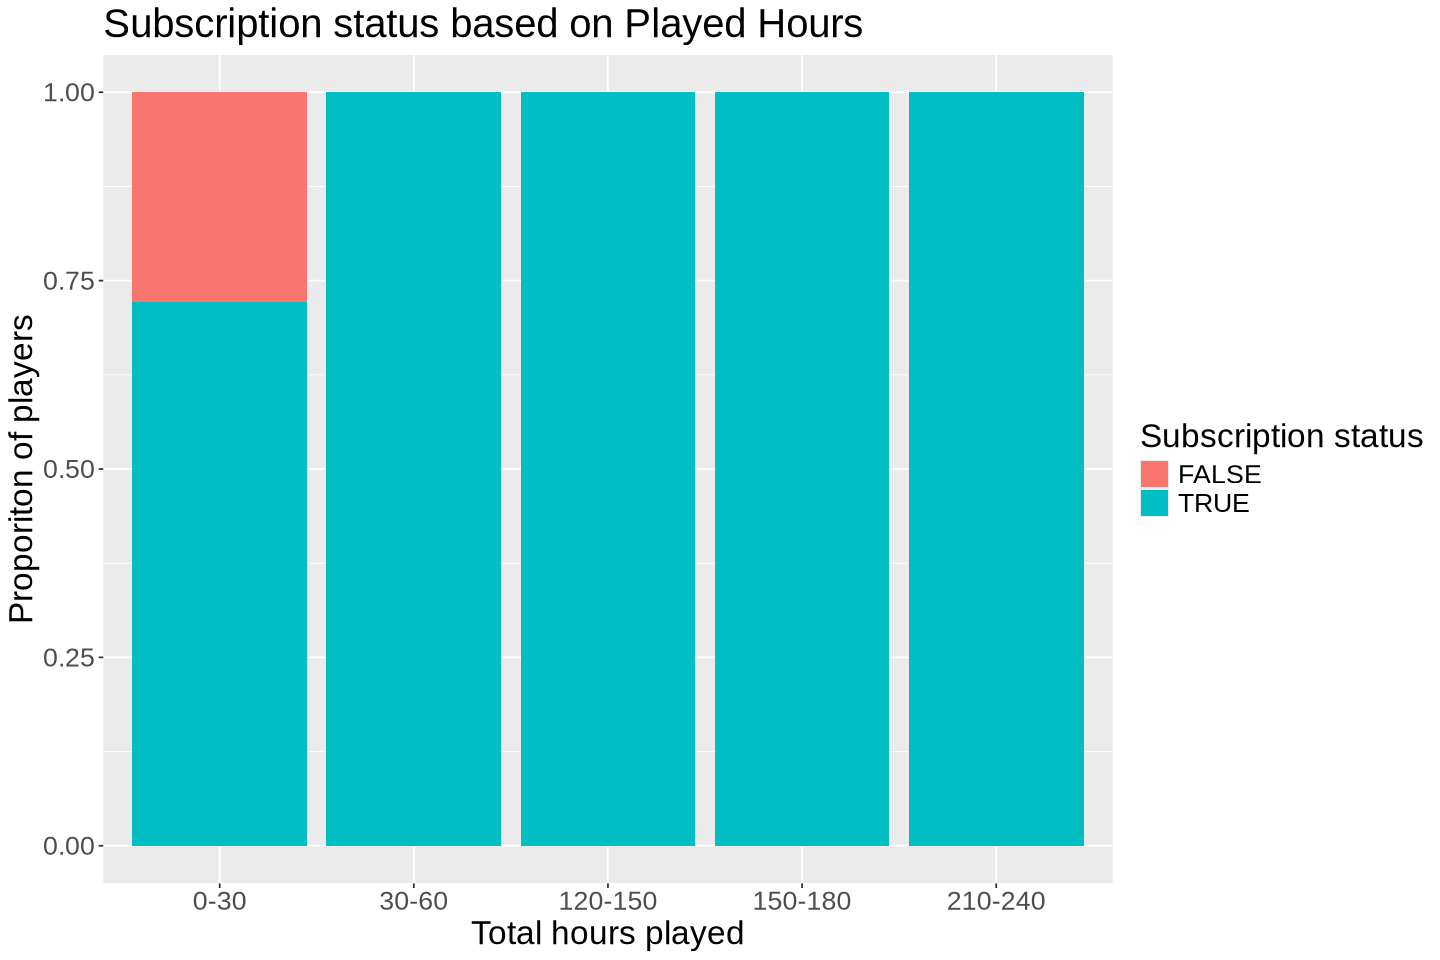

In [8]:
players_hours_grouped <- players_data |>
            mutate(hours_grouped = 
            cut(players_data$played_hours,
            breaks = seq(0, 240, by = 30),
            labels = c("0-30", "30-60", "60-90", "90-120", "120-150", "150-180", "180-210", "210-240"),
            include.lowest = TRUE,
            right = TRUE)) |>
            select(hours_grouped, subscribe)

players_plot_hrs <- players_hours_grouped |>
        ggplot(aes(x = hours_grouped, fill = subscribe)) +
        geom_bar(position = "fill") +
        labs(x = "Total hours played", y = "Proporiton of players", fill = "Subscription status") +
        ggtitle("Subscription status based on Played Hours") +
        theme(text = element_text(size = 20))
players_plot_hrs

Here, we see some variability in subscription status in players who spent less than 30 hours playing. Players who spent over 30 hours on the server are all subscribed. This could be interpreted as a weak relationship between playtime and subscription, where fewer played hours leads to fewer subscriptions. This is further supported by the first graph, where experience levels with a lower average of played hours had a higher proportion of unsubscribed players.

## 4) Methods and Plan

Now that we have visualized our data, we must select a suitable prediction method.

Knn-classification would be most appropriate, as we are predicting a categorical variable (subscription status). Additionally, the data is non-linear, so linear regression would not be helpful. As knn-classification is designed to require few assumptions, we do not need to apply any to our data. Like any model, knn-classification has its limitations. To start, results may not be accurate if one class is overrepresented. Additionally, the model struggles with larger datasets and when there are numerous predictor variables.

To process the data, the "experience" variable must first be transformed into a numerical format. Knn measures distances between points, and this cannot be done with a categorical variable as is. Next, both "experience" and "played hours" must be scaled and balanced to ensure they contribute equal weighting to the knn calculations. To train the model, we need to split the data into a training (70%) and testing (30%) set, and perform cross-validation on the training set. This should return the most accurate K value to use in our model. Our trained model will then be applied to the testing data, and the accuracy predicted.

## 5) GitHub Repository

https://github.com/nkatanchik/dsci_project_planning.git